In [1]:
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


### Tuning MLP for structured-data regression  (Normalization + DenseBlock)


In [2]:
input_node = ak.StructuredDataInput()
output_node = ak.Normalization()(input_node)
output_node = ak.DenseBlock(use_batchnorm=False, dropout=0.0)(output_node)
output_node = ak.RegressionHead(dropout=0.0)(output_node)
auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42
)


In [3]:
from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()

# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(house_dataset.target, name="MEDV")

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(
    data, target, test_size=0.2, random_state=42
)

auto_model.fit(train_data, train_targets, batch_size=1024, epochs=150)


Trial 10 Complete [00h 03m 17s]
val_loss: 0.5840620398521423

Best val_loss So Far: 0.2850073277950287
Total elapsed time: 00h 18m 15s
Epoch 1/150
17/17 [==============================] - 1s 43ms/step - loss: 2.4654 - mean_squared_error: 2.4654
Epoch 2/150
17/17 [==============================] - 1s 43ms/step - loss: 0.8737 - mean_squared_error: 0.8737
Epoch 3/150
17/17 [==============================] - 1s 43ms/step - loss: 0.6592 - mean_squared_error: 0.6592
Epoch 4/150
17/17 [==============================] - 1s 61ms/step - loss: 0.5294 - mean_squared_error: 0.5294
Epoch 5/150
17/17 [==============================] - 1s 75ms/step - loss: 0.4527 - mean_squared_error: 0.4527
Epoch 6/150
17/17 [==============================] - 1s 70ms/step - loss: 0.4125 - mean_squared_error: 0.4125
Epoch 7/150
17/17 [==============================] - 1s 72ms/step - loss: 0.3900 - mean_squared_error: 0.3900
Epoch 8/150
17/17 [==============================] - 1s 70ms/step - loss: 0.3774 - mean_squared

### Visualize the best pipeline


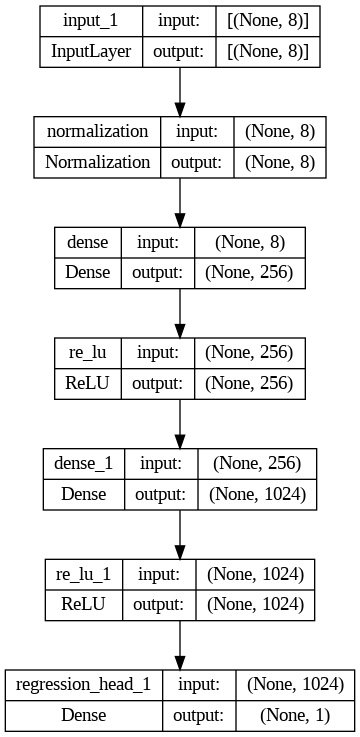

In [4]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(
    best_model, show_shapes=True, expand_nested=True
)  # rankdir='LR'


### Evaluate best pipeline


In [5]:
test_loss, test_acc = auto_model.evaluate(test_data, test_targets, verbose=0)
print("Test accuracy: ", test_acc)


Test accuracy:  0.2748621106147766


### Show best trial


Results summary
Results in ./auto_model
Showing 1 best trials
Trial summary
Hyperparameters:
dense_block_1/num_layers: 2
dense_block_1/units_0: 256
dense_block_1/units_1: 1024
optimizer: adam
learning_rate: 0.001
Score: 0.2850073277950287


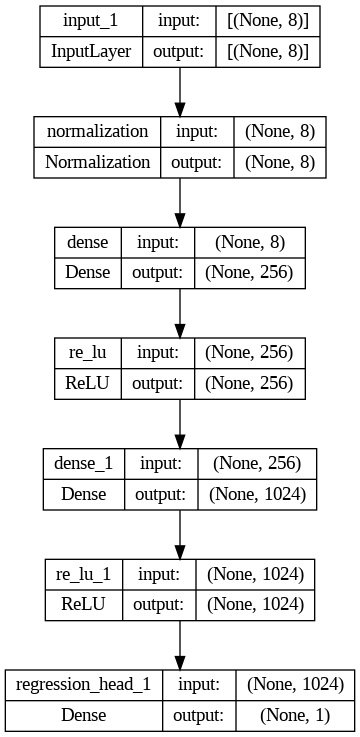

In [6]:
auto_model.tuner.results_summary(num_trials=1)
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True)


In [7]:
from tensorflow import keras

best_model.save("saved_model")
best_model = keras.models.load_model("saved_model")


### Customize the search space for tuning MLP


In [8]:
from keras_tuner.engine import hyperparameters as hp

input_node = ak.StructuredDataInput()
output_node = ak.Normalization()(input_node)
output_node = ak.DenseBlock(
    num_layers=1,
    num_units=hp.Choice("num_units", [128, 256, 512, 1024]),
    use_batchnorm=False,
    dropout=0.0,
)(output_node)
output_node = ak.DenseBlock(
    num_layers=1,
    num_units=hp.Choice("num_units", [16, 32, 64]),
    use_batchnorm=False,
    dropout=0.0,
)(output_node)
output_node = ak.RegressionHead()(output_node)
auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42
)

auto_model.fit(train_data, train_targets, batch_size=1024, epochs=150)



Trial 10 Complete [00h 01m 04s]
val_loss: 0.31757721304893494

Best val_loss So Far: 0.28434473276138306
Total elapsed time: 00h 12m 20s
Epoch 1/150
17/17 [==============================] - 1s 26ms/step - loss: 2.5759 - mean_squared_error: 2.5759
Epoch 2/150
17/17 [==============================] - 0s 25ms/step - loss: 0.9075 - mean_squared_error: 0.9075
Epoch 3/150
17/17 [==============================] - 0s 27ms/step - loss: 0.7267 - mean_squared_error: 0.7267
Epoch 4/150
17/17 [==============================] - 0s 29ms/step - loss: 0.6092 - mean_squared_error: 0.6092
Epoch 5/150
17/17 [==============================] - 0s 24ms/step - loss: 0.5265 - mean_squared_error: 0.5265
Epoch 6/150
17/17 [==============================] - 0s 25ms/step - loss: 0.4683 - mean_squared_error: 0.4683
Epoch 7/150
17/17 [==============================] - 0s 25ms/step - loss: 0.4316 - mean_squared_error: 0.4316
Epoch 8/150
17/17 [==============================] - 0s 25ms/step - loss: 0.4101 - mean_squar

### Display the best pipeline


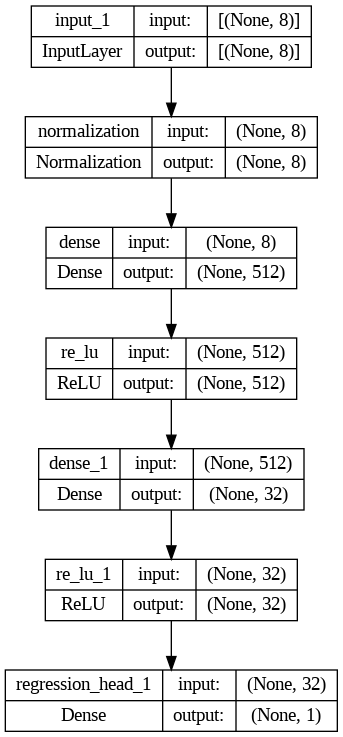

In [9]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(
    best_model, show_shapes=True, expand_nested=True
)  # rankdir='LR'


In [10]:
test_loss, test_acc = auto_model.evaluate(test_data, test_targets, verbose=0)
print("Test accuracy: ", test_acc)


Test accuracy:  0.2727588713169098


In [11]:
auto_model.tuner.results_summary(num_trials=1)


Results summary
Results in ./auto_model
Showing 1 best trials
Trial summary
Hyperparameters:
dense_block_1/units_0: 512
dense_block_2/units_0: 32
regression_head_1/dropout: 0.0
optimizer: adam
learning_rate: 0.001
Score: 0.28434473276138306


In [12]:
best_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               4608      
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             